# Ler dados do .csv

In [3]:
import pandas as pd

df = pd.read_csv("covid.csv")
df.head(10)

,nomeMunicipio,dataCaso,confirmadosCaso,recuperadosCaso,obitosCaso,suspeitosCaso,descartadosCaso
0,Astolfo Dutra,2020-05-29,11.0,4.0,0.0,73.0,7.0
1,Astolfo Dutra,2020-06-03,14.0,6.0,1.0,150.0,8.0
2,Astolfo Dutra,2020-06-02,14.0,4.0,1.0,108.0,8.0
3,Astolfo Dutra,2020-06-01,14.0,4.0,1.0,81.0,8.0
4,Astolfo Dutra,2020-05-31,14.0,4.0,1.0,76.0,7.0
5,Astolfo Dutra,2020-05-30,13.0,4.0,0.0,74.0,7.0
6,Astolfo Dutra,2020-05-28,10.0,4.0,0.0,68.0,6.0
7,Astolfo Dutra,2020-05-27,9.0,2.0,0.0,68.0,5.0
8,Astolfo Dutra,2020-05-26,9.0,2.0,0.0,66.0,5.0
9,Astolfo Dutra,2020-05-25,9.0,2.0,0.0,64.0,5.0


# Óbitos em JF

In [4]:
cidade = "Juiz de Fora"
df_jf = df.loc[df['nomeMunicipio'] == cidade].drop(['confirmadosCaso', 'recuperadosCaso', 'suspeitosCaso', 'descartadosCaso'], axis=1)
df_jf = df_jf.sort_values(by=['dataCaso'])

df_jf

,nomeMunicipio,dataCaso,obitosCaso
4735,Juiz de Fora,2020-03-26,0.0
4734,Juiz de Fora,2020-03-27,0.0
4733,Juiz de Fora,2020-03-30,0.0
4732,Juiz de Fora,2020-03-31,0.0
4731,Juiz de Fora,2020-04-01,0.0
...,...,...,...
4892,Juiz de Fora,2021-01-14,590.0
4893,Juiz de Fora,2021-01-15,598.0
4894,Juiz de Fora,2021-01-18,605.0
4895,Juiz de Fora,2021-01-19,628.0


# Gráfico

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.style.use('seaborn-whitegrid')

def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'deaths': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Deaths')
    df.set_index('dates')['deaths'].plot(legend=True, grid=True, label='Predicted Deaths')
    plt.title("COVID-19 in JF ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Deaths")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Deaths')
    red_patch = mpatches.Patch(color='red', label='Confirmed Deaths')
    plt.yticks(np.arange(min(y), max(y), step=20))
    plt.legend(handles=[red_patch, blue_patch])

In [6]:
import datetime
import numpy as np

diasASimular = 90
totalDeDiasReais = 60

dfForPlot = df_jf[df_jf['obitosCaso'] != 0]

In [7]:
XTrain = np.arange(0, len(dfForPlot['dataCaso'][0:totalDeDiasReais]))
yTrain = dfForPlot['obitosCaso'][0:totalDeDiasReais]

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlot['dataCaso']
yRealCases = dfForPlot['obitosCaso']

predictedDays = pd.date_range(start = dfForPlot['dataCaso'].iloc[totalDeDiasReais], periods=diasASimular, freq='D')
X = np.append(dfForPlot['dataCaso'][0:totalDeDiasReais], predictedDays)

#len(XTrain), len(yTrain), len(XRealCases), len(yRealCases), len(X)
X = pd.to_datetime(X)

# Regressão Linear

In [8]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
try:
    LRModel.fit(XTrain.reshape(-1, 1), yTrain)
except:
    pass

In [9]:
#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1

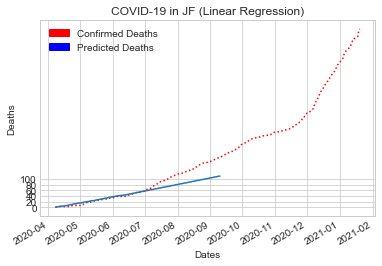

In [10]:
plotGraph(pd.to_datetime(X), y, pd.to_datetime(XRealCases), yRealCases, "Linear Regression")

# Erro

In [11]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(yRealCases[0:totalDeDiasReais + diasASimular], y)

3163.12

# Regressão  Polinomial grau 2

In [15]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

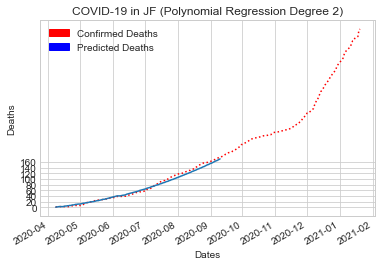

In [16]:
plotGraph(pd.to_datetime(X), y, pd.to_datetime(XRealCases), yRealCases, "Polynomial Regression Degree 2")

In [17]:
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(yRealCases[0:totalDeDiasReais + diasASimular], y)

1073.9266666666667

# Regressão Polinomial grau 3

In [19]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

In [22]:
#y.sort()

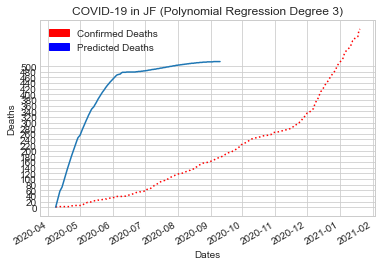

In [23]:
plotGraph(pd.to_datetime(X), y, pd.to_datetime(XRealCases), yRealCases, "Polynomial Regression Degree 3")

In [44]:
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(yRealCases[0:totalDeDiasReais + diasASimular], y)

725.1444444444444

# Regressão Arvore de Decisão

In [45]:
#treino
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(XTrain.reshape(-1, 1), yTrain)
    
#predição
y = regressor.predict(XPredict.reshape(-1, 1)).astype(int)

#miny = min(y)
#y = y + miny * -1
#y = np.flip(y, 0)

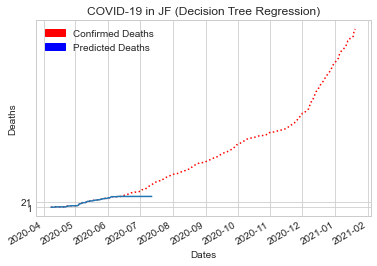

In [46]:
plotGraph(pd.to_datetime(X), y, pd.to_datetime(XRealCases), yRealCases, "Decision Tree Regression")

In [47]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(yRealCases[0:totalDeDiasReais + diasASimular], y)

341.72222222222223

# Regressão Random Forest

In [48]:
#treino
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(XTrain.reshape(-1, 1), yTrain)
    
#predição
y = regressor.predict(XPredict.reshape(-1, 1)).astype(int)

#miny = min(y)
#y = y + miny * -1
#y = np.flip(y, 0)

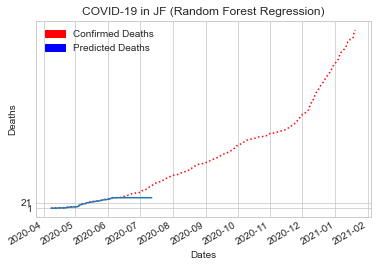

In [49]:
plotGraph(pd.to_datetime(X), y, pd.to_datetime(XRealCases), yRealCases, "Random Forest Regression")

In [50]:
from sklearn.metrics import mean_squared_error 

# Calculation of Mean Squared Error (MSE) 
mean_squared_error(yRealCases[0:totalDeDiasReais + diasASimular], y)

359.8222222222222